(200, 200, 1)


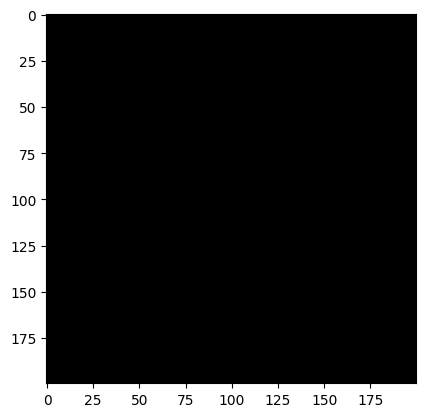

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt


ancho = 200
alto = 200


gris_img = np.zeros((ancho,alto,1), dtype = np.uint8)

print(gris_img.shape)

plt.imshow(gris_img, cmap='gray')

plt.show()


TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

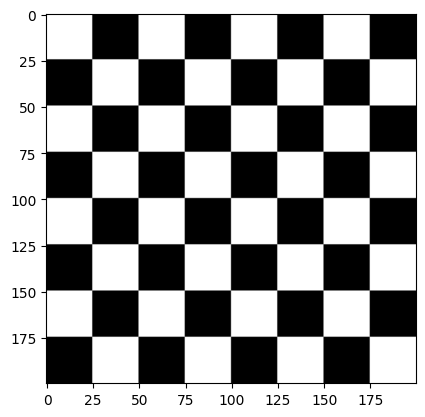

In [22]:
#Modifica un par de zonas rectangulares de la imagen
gris_img[:] = 0

#gris_img[x1:x2,y1:y2] = 255 #Especifica el canal 0

x1=0
x2=25
y1=0
y2=25

for i in range(8):
    
    for j in range(4):
        gris_img[x1:x2,y1:y2] = 255
        y1+=50
        y2+=50
    x1+=25
    x2+=25
    if i%2 == 0:
        y1=25
        y2=50
    else:
        y1=0
        y2=25


plt.imshow(gris_img, cmap='gray')
plt.show()

Funciones de dibujo.
OpenCV dispone de distintas funciones específicas para dibujar formas básicas (más información https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html )

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

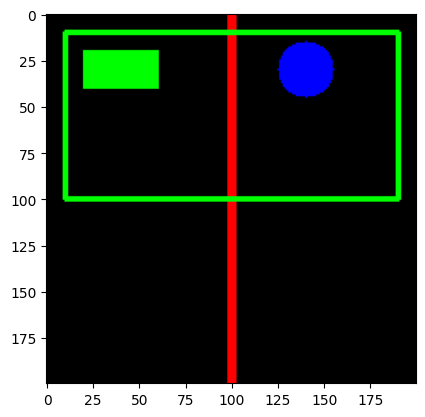

True

In [23]:
#Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)

#Línea roja vertical de grosor 3
cv2.line(color_img,(int(ancho/2),0),(int(ancho/2),alto),(255,0,0),3)
#Rectángulo con grosor 2
cv2.rectangle(color_img,(10,10),(ancho-10,int(alto/2)),(0,255,0),2)
#Rectángulo relleno
cv2.rectangle(color_img,(20,20),(60,40),(0,255,0),-1)
#Círculo de radio 15 relleno
cv2.circle(color_img,(ancho-60,30), 15, (0,0,255), -1)
#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()


#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [9]:
vid = cv2.VideoCapture(0)
  
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h,w*2,3), dtype = np.uint8)
left = collage[0:h,0:w]
right = collage[0:h,w:w+w]


while(True):      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        #Dimensiones

        r = frame[:,:,0]
        v = frame[:,:,1]
        a = frame[:,:,2]
        
        

        #Jugamos
        left[:,:,0] = v
        left[:,:,1] = a
        left[:,:,2] = r 

        
        right[:,:,0] = 255 - r
        right[:,:,1] = 255 - v
        right[:,:,2] = 255 - a


        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam', collage)

    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen  ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [8]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #Dimensiones

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)
    
        
        cv2.circle(frame, min_loc, 3, (0,255,0), -1)
        cv2.circle(frame, max_loc, 3, (0,0,255), -1)
        
        cv2.imshow('Cam3', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [15]:
# Inicializar la captura de video desde la cámara
vid = cv2.VideoCapture(0)  # Puedes ajustar el número si tienes múltiples cámaras

while (True):
    # Capturar un nuevo fotograma desde la cámara
    ret, frame = vid.read()

    # Obtener las dimensiones del fotograma
    height, width, _ = frame.shape  # El tercer valor es el número de canales (generalmente 3 para RGB)

    # Inicializar variables para el pixel más claro y más oscuro
    max_loc = (0, 0)
    max_value = 0
    min_loc = (0, 0)
    min_value = 255  # Inicializamos con un valor máximo

    # Recorrer cada bloque 8x8 de píxeles en el fotograma
    block_size = 8
    for x in range(0, width - block_size, block_size):
        for y in range(0, height - block_size, block_size):
            # Calcular el valor promedio del bloque
            block = frame[y:y+block_size, x:x+block_size]
            val = np.mean(block)

            # Actualizar el valor y posición del pixel más claro
            if val > max_value:
                max_value = val
                max_loc = (x, y)

            # Actualizar el valor y posición del pixel más oscuro
            if val < min_value:
                min_value = val
                min_loc = (x, y)

    # Dibujar círculos en las zonas 8x8 más claras y oscuras
    cv2.circle(frame, max_loc, 4, (0, 0, 255), -1)  # Rojo para el más claro
    cv2.circle(frame, min_loc, 4, (255, 0, 0), -1)  # Azul para el más oscuro

    # Mostrar el fotograma con los círculos dibujados
    cv2.imshow("Video Feed", frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(20) == 27:
        break

# Liberar la cámara y cerrar la ventana de visualización
vid.release()
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art

In [10]:
        
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
leftu = collage[0:h,0:w]
rightu = collage[0:h,w:w+w]
leftb = collage[h:h+h,0:w]
rightb = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
    
        r = frame[:,:,0]
        v = frame[:,:,1]
        a = frame[:,:,2]

        #Jugamos
        leftu[:,:,0] = a
        leftu[:,:,1] = 125 - v
        leftu[:,:,2] = r

        rightu[:,:,0] = 80 - r
        rightu[:,:,1] = v
        rightu[:,:,2] = r

        leftb[:,:,0] = 125 - r
        leftb[:,:,1] = a
        leftb[:,:,2] = v
    
        rightb[:,:,0] = a
        rightb[:,:,1] = r
        rightb[:,:,2] = 125 - v



        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
        